In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
#abrindo os dados
df = pd.read_csv('ET0.csv')

In [17]:
# Retirando valores nulos
df = df.dropna()
df= df.drop(['Estacao', 'Data', 'Hora'], axis = 1)

([<matplotlib.axis.YTick at 0x7f2930887c18>,
 <a list of 11 Text yticklabel objects>)

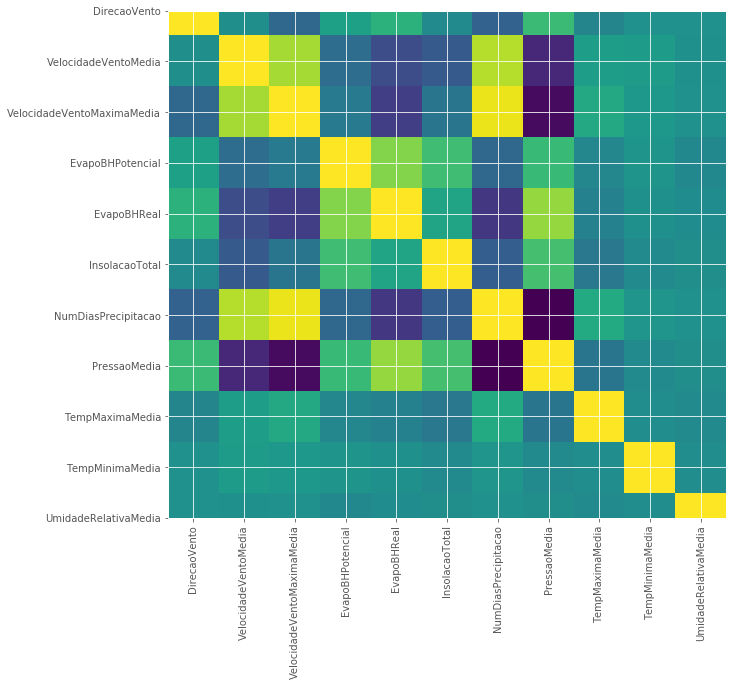

In [8]:
# Analisando a correlação dos dados

plt.figure(figsize=(10,10))
plt.style.use('ggplot')
plt.imshow(df.corr())
plt.xticks(range(len(df.columns)),df.columns.values,rotation='vertical')
plt.yticks(range(len(df.columns)),df.columns.values)

In [18]:
x = df[[ 'VelocidadeVentoMedia',  'VelocidadeVentoMaximaMedia', 'InsolacaoTotal', 
        'NumDiasPrecipitacao', 'PressaoMedia',
       'TempMaximaMedia', 'TempMinimaMedia', 'UmidadeRelativaMedia']].values

y = df[['EvapoBHReal']]


In [19]:
# Padronizando os dados 

from sklearn.preprocessing import StandardScaler

In [20]:
stander = StandardScaler()
x = stander.fit(x).transform(x)

In [21]:
# dividindo o conjunto de dados 
from sklearn.model_selection import train_test_split

In [92]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [24]:
# Chamando a algoritmos de machine learning
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

In [33]:
# cria dicionario com os algorimos utilizados 
ESTIMATORS = {                              
    "RandomForestRegressor": RandomForestRegressor(max_depth=100, random_state=2),    
    "SVR":SVR(gamma='auto'),   
    "GBR" :GradientBoostingRegressor(n_estimators=35),
    "AdaB" :AdaBoostRegressor(n_estimators=5)
}

In [26]:
import time
from sklearn.metrics import mean_squared_error

In [93]:
# aplicando os algortimos
y_test_predict = dict()
Tii = time.process_time()
y_mse = dict()
y_r2 = dict()
tempro = dict()
i=1
for name, estimator in ESTIMATORS.items():
    Ti = time.clock()
    estimator.fit(x_train, y_train.values.ravel())                    # fit() with instantiated object
    y_test_predict[name] = previsao = estimator.predict(x_test)   # Make predictions and save it in dict under key: name
    y_mse[name] = mean_squared_error(y_test, estimator.predict(x_test))
    y_r2[name] = estimator.score(x_test,y_test.values.ravel())
    Tf = time.clock()    
    tempro[name] = Tf - Ti
    print(name + ' Concluido')

    

Resultados=pd.DataFrame({'mse':list(y_mse.values()),    # Padronizando o os dois
                 'R2':list(y_r2.values()),
               'Tempo':list(tempro.values())},               
                index=list(y_r2.keys()))

Tff = time.process_time()

print(Tff - Tii)

RandomForestRegressor Concluido
SVR Concluido
GBR Concluido
AdaB Concluido
0.10834417800015217


In [94]:
Resultados

,mse,R2,Tempo
RandomForestRegressor,314.434333,0.839959,0.033173
SVR,1310.550848,0.332956,0.013907
GBR,317.515756,0.838391,0.033396
AdaB,393.447593,0.799743,0.022390


## hiperparâmetros para o random forest e GB

In [101]:
parameters = {    
    'n_estimators':[50,100],
    "learning_rate": [0.01, 0.075,  0.2], 
    "min_samples_split": [0.1,0.05] ,
    "min_samples_leaf": [0.1,0.05],
    "max_depth":[3,8], 
    "subsample":[0.5, 0.6]       
    }

In [102]:
from sklearn.model_selection import GridSearchCV

In [103]:
estimador = GradientBoostingRegressor()
model = GridSearchCV(estimador,parameters,cv = 5, n_jobs = 3)

In [104]:
import time 

In [105]:
t1 = time.process_time()
model.fit(x_train,y_train.values.ravel())

t2 = time.process_time()

print(t2-t1)

0.9107865339997261


/home/pensario/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [106]:
model.best_score_

0.87718005767608354

In [50]:
model.best_params_

{'learning_rate': 0.1,
 'max_depth': 8,
 'min_samples_leaf': 0.10000000000000001,
 'min_samples_split': 0.10000000000000001,
 'n_estimators': 100,
 'subsample': 0.618}

In [107]:
model.best_estimator_

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.075, loss='ls', max_depth=8,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=0.05, min_samples_split=0.05,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=0.5, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [108]:
model.score(x_test,y_test.values.ravel())

0.81275493273631172

# Random forest

In [58]:
# param_grid = {
#     'bootstrap': [True],
#     'max_depth': [80, 90, 100, 110],
#     'max_features': [2, 3],
#     'min_samples_leaf': [3, 4, 5],
#     'min_samples_split': [8, 10, 12],
#     'n_estimators': [100, 200, 300, 1000]
# }

In [95]:
  param_grid = { 
            "n_estimators"      : [100,500,2000],
            "criterion"         : ['mse','mae'],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }

In [96]:
rf = RandomForestRegressor()
model1 = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 2, n_jobs=3)

In [97]:
t1 = time.process_time()
model1.fit(x_train,y_train.values.ravel())

t2 = time.process_time()

print(t2-t1)

1.2097981509996316


In [91]:
model1.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=None,
                      max_features='log2', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=4,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [98]:
model1.best_score_

0.87649783482341637

In [99]:
model1.score(x_test,y_test.values.ravel())

0.83743425053010467

In [109]:
model.score(x_test,y_test.values.ravel())

0.81275493273631172

# Gráficos


In [110]:
from yellowbrick.regressor import PredictionError

In [124]:
visualizer = PredictionError(model1)

0.83743425053010467

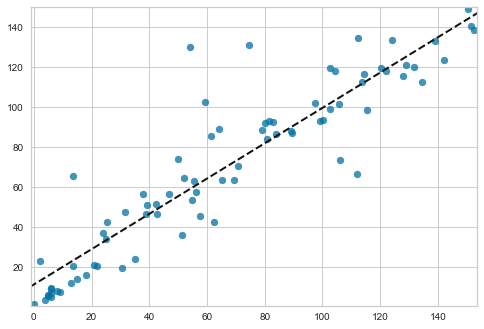

In [125]:
visualizer.fit(x_train,y_train.values.ravel())
visualizer.score(x_test,y_test.values.ravel())


In [140]:
from yellowbrick.regressor import ResidualsPlot

0.81275493273631172

/home/pensario/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pensario/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


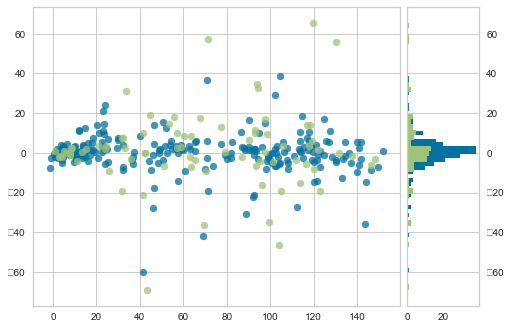

In [143]:
visualizer = ResidualsPlot(model)
visualizer.fit(x_train,y_train.values.ravel())
visualizer.score(x_test,y_test.values.ravel())